# Import libraries

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


**Read file and change date formate**

In [2]:
spy_data = pd.read_csv('yahoo.csv')
spy_data['Date'] = pd.to_datetime(spy_data['Date'])
spy_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
5,2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,2080.409912,4245030000
6,2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,2090.110107,1466840000
7,2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2088.870117,2852940000
8,2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,2089.139893,3884930000
9,2015-11-23,2089.409912,2095.610107,2081.389893,2086.590088,2086.590088,3587980000


**index and sorting**

In [3]:
# set as index
spy_data.set_index('Date',inplace= True)
#sorting with decreasing order to display the last lower date at top
spy_data.sort_values('Date',ascending=True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000


**check the null value**


In [10]:
variables = spy_data.columns
spy_data.isnull().sum().loc[variables] #result is zero means no null value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# exploratory data analysis

**Check if there is any mutual relationship between veriables**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


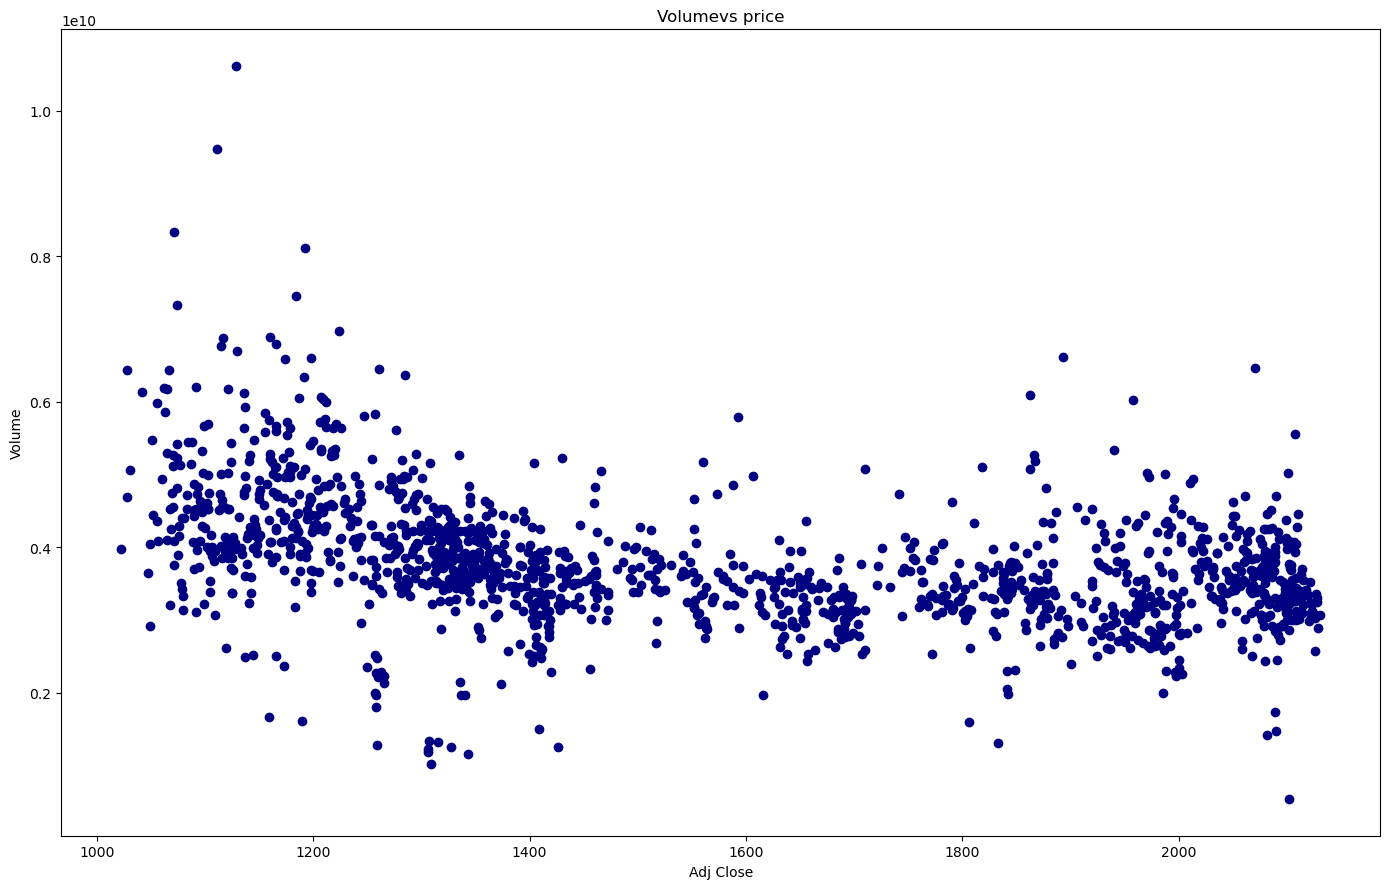

In [20]:
jet = plt.get_cmap('jet') 
colors = iter(jet(np.linspace(0,1,10)))
def correlation(df,variables,n_rows,n_cols):
    fig = plt.figure(figsize=(14,9))
    for i,var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df['Adj Close'] , asset,c = next(colors))
        ax.set_xlabel('Adj Close')
        ax.set_ylabel('{}'.format(var))
        ax.set_title(var + 'vs price')
    fig.tight_layout()
    plt.show()
variables = spy_data.columns[-1:]    
correlation(spy_data,variables,1,1)    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

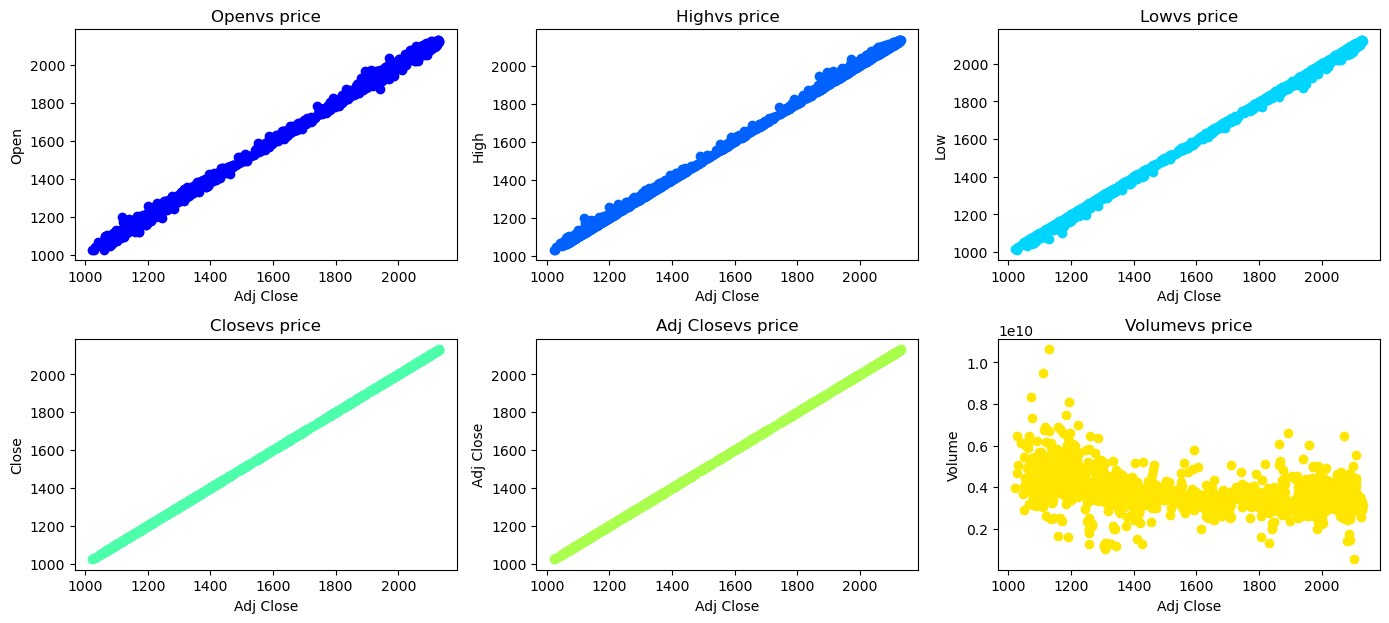

In [21]:
variables = spy_data.columns[0:6]
correlation(spy_data,variables,3,3)

In [22]:
spy_data.corr()['Adj Close'].loc[variables]

Open         0.999187
High         0.999637
Low          0.999702
Close        1.000000
Adj Close    1.000000
Volume      -0.408814
Name: Adj Close, dtype: float64

In [ ]:
spy_data['High-Low_pct'] = (spy_data['High']-spy_data['Low']).pct_change()
